# Explanatory Data Analysis
生死推定に有用そうな情報を探索してみる

In [6]:
# Import basic libraries.
import os

import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
# Data directory
DATA_DIR = "../data/titanic"
RESULT_DIR = "../result/20220713_nb03"
os.makedirs(RESULT_DIR, exist_ok=True)

## Get cross correlation between columns

In [8]:
df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
droprows = ["PassengerId", "Name", "Ticket", "Cabin"]
df = df.drop(droprows, axis=1)

df_cat = df.replace("male", 0).replace("female", 1)
df_cat = df_cat.replace("S", 0).replace("C", 1).replace("Q", 2)

df_cat.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


## Show heatmap of the correlation

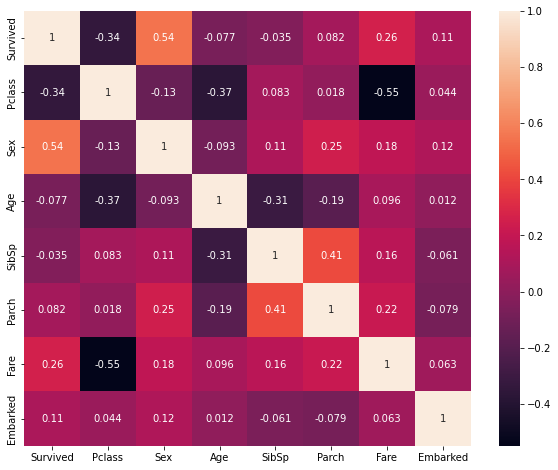

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df_cat.corr(), annot=True, ax=ax)
plt.savefig(os.path.join(RESULT_DIR, "corr_heat.png"))

## Categorical plot

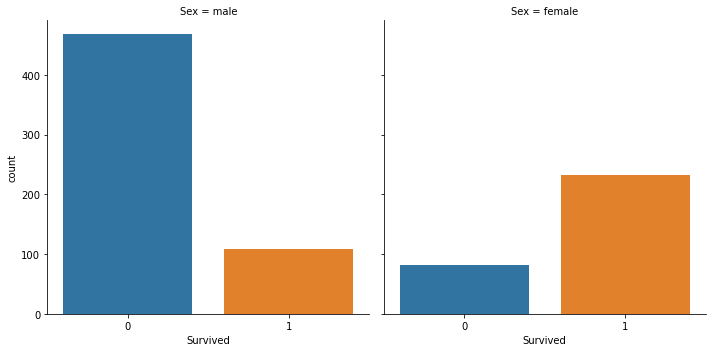

In [10]:
sns.catplot(x='Survived', col="Sex", kind="count", data=df)
plt.savefig(os.path.join(RESULT_DIR, "cat_sex.png"))

## Estimate only based on sex information

In [11]:
dft = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))
dft["Survived"] = dft["Sex"] == "female"
dft["Survived"] = dft["Survived"].astype(int)
dft[["PassengerId", "Survived"]].to_csv(os.path.join(RESULT_DIR, "submission.csv"), index=False)